In [2]:
import math
import pandas as pd
import numpy as np
import numpy
import yfinance as yf
import matplotlib.pyplot as plt


## Collecting Data

In [3]:
data_NSE = yf.download("^NSEI", start="2010-01-01", end="2023-05-01", interval="1d")
data_NASDAQ = yf.download("^IXIC", start="2010-01-01", end="2023-05-01", interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data_NSE.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


In [5]:
data_NASDAQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000


### Cleaning Data 
Keeping only common-date data between the two indices

In [6]:
print("Before Cleaning -", len(data_NSE.index), len(data_NASDAQ.index))

common_Idx = data_NSE.index.intersection(data_NASDAQ.index)
data_NSE = data_NSE.loc[common_Idx]
data_NASDAQ = data_NASDAQ.loc[common_Idx]

print("After Cleaning -", len(data_NSE.index), len(data_NASDAQ.index))

Before Cleaning - 3268 3353
After Cleaning - 3182 3182


## Correlation Analysis

In [7]:
correlation_Coeff = data_NSE.Close.corr(data_NASDAQ.Close)
print(correlation_Coeff)

0.9513138758576783


The correlation coefficient between the NASDAQ and NSE Index comes out to be **0.9548**, which implies -
- The strength of the relationship between the two indices is around 95.48 %.
- Positive Sign of the coefficient, indicates the relation to be a **direct relation** (or positive).

## Lead-Lag Relationship

### A. Lead-Lag Analysis

In [8]:
cross_Corr = []
for i in range(-20, 20):
    cross_Corr.append(data_NSE.Close.corr(data_NASDAQ.Close.shift(i)))
    print(i, cross_Corr[-1])

-20 0.9409305687253504
-19 0.9414671972645153
-18 0.9419817711760604
-17 0.9425051748837595
-16 0.9429986459534779
-15 0.943467591905385
-14 0.9439585841757134
-13 0.9444449257356793
-12 0.9449920822098853
-11 0.9455306106805285
-10 0.9460633295628981
-9 0.9466095202451897
-8 0.9471446302076983
-7 0.9477096919386553
-6 0.9482362261854125
-5 0.948751310214809
-4 0.9492839758160373
-3 0.9497767429972327
-2 0.950286280116005
-1 0.9507737700328763
0 0.9513138758576783
1 0.9516503507715616
2 0.95176397267261
3 0.9518652512683698
4 0.9519697336679616
5 0.9520755817110503
6 0.9521699858696249
7 0.9522823272755722
8 0.9523740066690728
9 0.9524293216670958
10 0.9524489370596474
11 0.9524735208555906
12 0.9525046891612216
13 0.9525043391188185
14 0.9524763924945745
15 0.9524737996586067
16 0.9524759625738249
17 0.9524841326289567
18 0.9524958241857171
19 0.9525336797311328


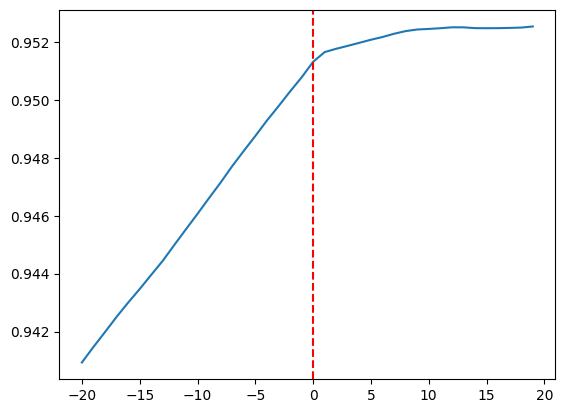

In [9]:
plt.plot(range(-20, 20), cross_Corr)
plt.axvline(x=0, linestyle='dashed', color='red')
plt.show()

When we apply a lag to the time series data of the NASDAQ Index, a stronger correlation between the values of both the indices is observed and to the contrary when we apply a lag to data of NSE Index (or lead to the data of NASDAQ Index) we observe a strongly decreasing correlation between them.

The above implies that the NASDAQ data is already Leading with respect to NSE data, that's why when we lag NASDAQ data the correlation increases

**-> NASDAQ is leading with respect to NSE**

### B. Granger's Causality Test

In [10]:
data = pd.concat([data_NSE.Close.rename('NSE', inplace=False), data_NASDAQ.Close.rename('NASDAQ', inplace=False)], axis=1)

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

#### CASE I -> NULL HYPOTHESIS: NSE does not causes NASDAQ

In [12]:
grangercausalitytests(data[['NASDAQ', 'NSE']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7184  , p=0.3967  , df_denom=3178, df_num=1
ssr based chi2 test:   chi2=0.7191  , p=0.3965  , df=1
likelihood ratio test: chi2=0.7190  , p=0.3965  , df=1
parameter F test:         F=0.7184  , p=0.3967  , df_denom=3178, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1360  , p=0.0022  , df_denom=3175, df_num=2
ssr based chi2 test:   chi2=12.2913 , p=0.0021  , df=2
likelihood ratio test: chi2=12.2676 , p=0.0022  , df=2
parameter F test:         F=6.1360  , p=0.0022  , df_denom=3175, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7190  , p=0.0007  , df_denom=3172, df_num=3
ssr based chi2 test:   chi2=17.1948 , p=0.0006  , df=3
likelihood ratio test: chi2=17.1485 , p=0.0007  , df=3
parameter F test:         F=5.7190  , p=0.0007  , df_denom=3172, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4843  , p=0.

{1: ({'ssr_ftest': (0.7183832312518176, 0.39673857741879237, 3178.0, 1),
   'ssr_chi2test': (0.7190613777885562, 0.3964519669213509, 1),
   'lrtest': (0.7189801185377291, 0.3964786526335031, 1),
   'params_ftest': (0.7183832312513934, 0.39673857741890795, 3178.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.136003608401253, 0.002189295143973481, 3175.0, 2),
   'ssr_chi2test': (12.291333212419516, 0.0021427470472400885, 2),
   'lrtest': (12.267640020218096, 0.002168282260093713, 2),
   'params_ftest': (6.136003608398207, 0.002189295143980211, 3175.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.718986075556011, 0.0006697780573567369, 3172.0, 3),
   'ssr_chi2test': (17.19482036651251, 0.0006444399374741417, 3),
   'lrtest': (17.14848503757821, 0.0006587440166701158, 3),
   'params_ftest': (5.718986075554667, 0.0006697780573580806, 3172.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In this case, the p-values of the test are not much less than the **Significant Value = 0.05** and hence the NULL HYPOTHESIS holds, which implies that NSE data canot predict NASDAQ data

#### CASE II -> NULL HYPOTHESIS: NASDAQ does not causes NSE

In [13]:
grangercausalitytests(data[['NSE', 'NASDAQ']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.7830 , p=0.0000  , df_denom=3178, df_num=1
ssr based chi2 test:   chi2=20.8026 , p=0.0000  , df=1
likelihood ratio test: chi2=20.7349 , p=0.0000  , df=1
parameter F test:         F=20.7830 , p=0.0000  , df_denom=3178, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=150.2889, p=0.0000  , df_denom=3175, df_num=2
ssr based chi2 test:   chi2=301.0512, p=0.0000  , df=2
likelihood ratio test: chi2=287.6409, p=0.0000  , df=2
parameter F test:         F=150.2889, p=0.0000  , df_denom=3175, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=107.2710, p=0.0000  , df_denom=3172, df_num=3
ssr based chi2 test:   chi2=322.5231, p=0.0000  , df=3
likelihood ratio test: chi2=307.1911, p=0.0000  , df=3
parameter F test:         F=107.2710, p=0.0000  , df_denom=3172, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=80.4496 , p=0.

{1: ({'ssr_ftest': (20.78298518908328, 5.337857811652436e-06, 3178.0, 1),
   'ssr_chi2test': (20.8026041178332, 5.091368816231389e-06, 1),
   'lrtest': (20.734878424045746, 5.274645183380636e-06, 1),
   'params_ftest': (20.782985189081263, 5.3378578116584e-06, 3178.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (150.2889033416882, 4.34294054413354e-63, 3175.0, 2),
   'ssr_chi2test': (301.0511575600431, 4.2420106111342965e-66, 2),
   'lrtest': (287.64088393119164, 3.4639823417121815e-63, 2),
   'params_ftest': (150.28890334170146, 4.3429405440808336e-63, 3175.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (107.2709878161799, 3.779002009656494e-66, 3172.0, 3),
   'ssr_chi2test': (322.5231433804879, 1.326020141962284e-69, 3),
   'lrtest': (307.19114342876856, 2.762753175880693e-66, 3),
   'params_ftest': (107.27098781618336, 3.779002009638987e-66, 3172.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1

In this case, the p-values of the test are less than the **Significant Value = 0.05** and hence the NULL HYPOTHESIS is rejected, which means that **NASDAQ data causes NSE data**

### Index for Parameter Optimisation 
We're going to use the **NASDAQ Index** for parameter optimisation due to the following reasons :
- NASDAQ came out to be leading over NSE, which implies that changes in NASDAQ occur before NSE. So choosing the Leading index as the base for parameter optimisation would yield better outcomes.
- We proved the dependence of NSE data on NASDAQ data using Granger's Causality Test.
- Both the Indices are highly correlated as well.

## Indicator Coding

### Bollinger Bands

In [14]:
def bollinger_bands(data, window=14):
    sma = data.rolling(window=window).mean()        # Simple Moving Average / Middle Band of bbands
    std = data.rolling(window=window).std()         # Std Deviation

    lower_bb = sma - std*2
    upper_bb = sma + std*2
    middle_bb = sma

    return lower_bb, middle_bb, upper_bb

### MACD Indicator

In [15]:
def macd_indicator(data, short_window=12, long_window=26, signal_period=9):
    ema_short = data.ewm(span=short_window, adjust=False).mean()
    ema_long = data.ewm(span=long_window, adjust=False).mean()

    macd = ema_short - ema_long
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    bars = macd - signal

    return macd, signal, bars

### Keltner Channel

In [16]:
def keltner_channel(close, low, high, kc_lookback=20, atr_lookback=10, multiplier=2):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    tr = pd.concat([tr1, tr2, tr3], axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()

    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower

## Parameter Optimisation

### Strategies and Generation of Signals
Before optimising the parameters we need to create strategies based on the above indicators and generate buy and sell signals from the same.<br/>
Afterwards we need to calculate different metrics on our signals and optimise the parameters using it.

#### Metrics for Comparison
Cumulative Returns, Drawdown, Volitality, Sharpe & Sortino Ratio

In [17]:
def volitality(returns):
    StdDevx = returns.std()
    vol = StdDevx * math.sqrt(252)  
    return vol

def sharpe_ratio(returns):
    Rx = returns.mean() * 252                                         
    Volx = returns.std() * math.sqrt(252)                              
    Rf = 0.06   

    sharpe = ((Rx - Rf)/Volx)
    return sharpe

def sortino_ratio(returns):
    Rx = returns.mean() * 252                                                                 
    StdDev_Neg = returns[returns < 0].std() * math.sqrt(252)
    Rf = 0.06 

    sortino = ((Rx - Rf)/StdDev_Neg)
    return sortino

def cumulative_returns(daily_data):
    return (daily_data[-1] - daily_data[0])/daily_data[0]

def maximum_drawdown(daily_data):
    max_drawdown = 0
    MAX = -math.inf
    MIN = math.inf

    for date in daily_data.index:
        if daily_data[date] > MAX:
            MAX = daily_data[date]
            MIN = math.inf
        if daily_data[date] < MIN:
            MIN = daily_data[date]

        max_drawdown = min(max_drawdown, ((MIN - MAX)/MAX))
    return max_drawdown

#### Signal Interpreting Function

In [18]:
# Outputs the returns and total assets value data for the days when the position is held
# The signals that we give it as input should be bound to the condition that only one position can be held at a time

def get_returns(close, signals):
    account = 100000
    buy_price = 0
    qty = 0

    daily_data = pd.Series(data=np.full(len(data.index), np.nan), index=data.index)
    for date in close.index:
        if signals[date] == 0:
            if qty != 0:
                daily_data[date] = account + (close[date] - buy_price)*qty
        if signals[date] == 1:
            if qty == 0:
                qty = account / close[date]
                buy_price = close[date]
            if qty < 0: 
                account += (close[date] - buy_price)*qty
                qty = 0
            daily_data[date] = account
        if signals[date] == -1:
            if qty == 0:
                qty = -1 * (account / close[date])
                buy_price = close[date]
            if qty > 0:
                account += (close[date] - buy_price)*qty
                qty = 0
            daily_data[date] = account

    daily_data.dropna(inplace=True)     # Dropping all the dates when no position was held 
    returns = ((daily_data - daily_data.shift(1))/daily_data.shift(1))
    returns.dropna(inplace=True)

    return daily_data, returns

#### Signal Generation Functions (For all the 3 indicator strategies)

In [19]:
def bbands_strategy(data, window=14):
    signals = pd.Series(data=np.zeros(len(data.index), dtype=int), index=data.index, dtype=int)
    lower_bb, middle_bb, upper_bb = bollinger_bands(data.Close, window)
    state = 0
    
    for i, current in enumerate(data.Close):
        if (np.isnan(lower_bb[i])):
            continue

        if data.Close[i-1] > lower_bb[i-1] and data.Close[i] < lower_bb[i] and state != 1:
            signals[data.index[i]] = 1
            state += 1
        if data.Close[i-1] < upper_bb[i-1] and data.Close[i] > upper_bb[i] and state != -1:
            signals[data.index[i]] = -1
            state -= 1

    return signals

In [20]:
def macd_strategy(data, short_window=12, long_window=26, signal_period=9):
    signals = pd.Series(data=np.zeros(len(data.index), dtype=int), index=data.index, dtype=int)
    macd, signal, bars = macd_indicator(data.Close, short_window, long_window, signal_period)
    state = 0

    for i, current in enumerate(data.Close):
        if (np.isnan(macd[i]) or np.isnan(signal[i])):
            continue

        if macd[i] > signal[i] and state != 1:
            signals[data.index[i]] = 1
            state += 1
        if macd[i] < signal[i] and state != -1:
            signals[data.index[i]] = -1
            state -= 1

    return signals

In [21]:
def kc_strategy(data, kc_lookback=20, atr_lookback=10, multiplier=2):
    signals = pd.Series(data=np.zeros(len(data.index), dtype=int), index=data.index, dtype=int)
    kc_middle, kc_upper, kc_lower = keltner_channel(data.Close, data.Low, data.High, kc_lookback, atr_lookback, multiplier)
    state = 0
    
    for i, current in enumerate(data.Close):
        if (np.isnan(kc_lower[i])):
            continue

        if data.Close[i] < kc_lower[i] and data.Close[i] < data.Close.shift(-1)[i] and state != 1:
            signals[data.index[i]] = 1
            state += 1
        if data.Close[i] > kc_upper[i] and data.Close[i] > data.Close.shift(-1)[i] and state != -1:
            signals[data.index[i]] = -1
            state -= 1

    return signals

#### Parameter Optimization

In [22]:
## FOR BBANDS
windows = range(10, 30, 1)

params = []
result = []
for window in windows:
    strategy = bbands_strategy(data_NASDAQ, window=window)
    daily_data, returns = get_returns(data_NASDAQ.Close, strategy)
    
    print(window, cumulative_returns(daily_data)*100, sharpe_ratio(returns))
    params.append([window])
    result.append((abs(cumulative_returns(daily_data))/cumulative_returns(daily_data)) * abs(cumulative_returns(daily_data)*100*sharpe_ratio(returns)))

10 213.3688827751917 0.43173115336889634
11 96.68934569175059 0.18011876765505563
12 239.4579315814406 0.42219765369298157
13 349.549478507254 0.5401212405448451
14 339.0552092908011 0.5685483133534669
15 274.67028474879635 0.48609886136719105
16 267.57898817702625 0.4752426662341091
17 191.5698270472687 0.3363638185577636
18 205.6565051840001 0.34213527091818957
19 210.18088569310126 0.33784406897018454
20 212.02899155177874 0.35743335666150094
21 220.6554260016451 0.37320403750346204
22 136.2503900291443 0.21657959586642045
23 104.45552735370678 0.1539035784322149
24 98.8767033509083 0.14119057291803064
25 83.3470299205118 0.10941466411815036
26 117.749734398051 0.18839853531395603
27 185.47486983199482 0.3051642177607981
28 119.86295760343302 0.19347635028191654
29 163.63681035266544 0.2744040581744764


In [23]:
params[result.index(max(result))]

[14]

In [24]:
## FOR KC
kc_lookback = range(10, 30, 2)
atr_lookbook = range(5, 25, 2)
multiplier = np.arange(0.5, 4, 0.25)

params = []
result = []
for kc in kc_lookback:
    for atr in atr_lookbook:
        for mul in multiplier:
            strategy = kc_strategy(data_NASDAQ, kc, atr, mul)
            daily_data, returns = get_returns(data_NASDAQ.Close, strategy)
            
            print(kc, atr, mul, cumulative_returns(daily_data)*100, sharpe_ratio(returns))
            params.append([kc, atr, mul])
            result.append((abs(cumulative_returns(daily_data))/cumulative_returns(daily_data)) * abs(cumulative_returns(daily_data)*100*sharpe_ratio(returns)))            

10 5 0.5 784.8287171093203 0.7104581464729262
10 5 0.75 369.55486182011225 0.450052180124704
10 5 1.0 340.4730388276228 0.4288874256502682
10 5 1.25 134.76679225411442 0.17283193942865135
10 5 1.5 132.69488630594324 0.18074523655125982
10 5 1.75 36.63630158468953 -0.003310488456085743
10 5 2.0 31.72067355231402 0.004637402997051866
10 5 2.25 -13.98840808347918 -0.003514930452385576
10 5 2.5 -20.058578711281168 -0.09870550256626467
10 5 2.75 -39.851350217374616 -0.22070113841651864
10 5 3.0 -84.06197277626845 -0.2221059958008417
10 5 3.25 -86.67731453459695 -0.21555055366556583
10 5 3.5 -416.22490055881684 0.18167475536839175
10 5 3.75 -416.22490055881684 0.18167475536839175
10 7 0.5 668.5163208432465 0.6526017066947564
10 7 0.75 307.5685770472815 0.3917044261079103
10 7 1.0 398.7758145681708 0.47659083051719286
10 7 1.25 164.97238134149694 0.2231853146026195
10 7 1.5 108.1808239380567 0.14030759007858118
10 7 1.75 94.35649790439162 0.11448132637556956
10 7 2.0 66.04719391476145 0.06574

In [25]:
params[result.index(max(result))]

[10, 15, 0.5]

In [26]:
## FOR MACD
params = []
result = []

short_window = range(5, 20, 2)
for sw in short_window:
    long_window = range(sw + 1, 35, 2)
    for lw in long_window:
        signal_period = range(1, lw-sw, 1)
        for sp in signal_period:
            try: 
                strategy = macd_strategy(data_NASDAQ, sw, lw, sp)
                daily_data, returns = get_returns(data_NASDAQ.Close, strategy)
                
                print(sw, lw, sp, cumulative_returns(daily_data)*100, sharpe_ratio(returns))
                params.append([sw, lw, sp])
                result.append((abs(cumulative_returns(daily_data))/cumulative_returns(daily_data)) * abs(cumulative_returns(daily_data)*100*sharpe_ratio(returns))) 
            except:
                pass           

5 8 2 -52.86929303168782 -0.5683194829428713
5 10 2 -48.4403532751737 -0.5261431396006181
5 10 3 -34.28594908769902 -0.4015443811228267
5 10 4 -42.53189416341666 -0.45597141938927227
5 12 2 -46.41195367969902 -0.5073479695127101
5 12 3 -37.070303031374216 -0.4231300384930971
5 12 4 -44.446152940419516 -0.46689504747043553
5 12 5 -51.521602885633996 -0.5263560789040659
5 12 6 -55.114466924989344 -0.5627725848199042
5 14 2 -46.541691905950216 -0.49797550347097724
5 14 3 -29.095006607885882 -0.37279869965830115
5 14 4 -41.61515178817025 -0.44834584839606934
5 14 5 -51.6991976560614 -0.5341914974060903
5 14 6 -47.369838283422055 -0.49329004172423
5 14 7 -41.70819984540594 -0.4512837332262469
5 14 8 -35.57426082841384 -0.40780403408694066
5 16 2 -39.790287823243084 -0.4470116789000787
5 16 3 -42.10073043119839 -0.4575913173491919
5 16 4 -42.107501010924885 -0.45952512066834234
5 16 5 -52.745284772694454 -0.5422494604910014
5 16 6 -44.5158212322223 -0.46880412433138674
5 16 7 -36.71512115013

In [27]:
params[result.index(max(result))]

[13, 34, 3]

##### Finally, the optimised parameters are: 
- Bollinger bands -> [14]
- Keltner channel -> [10, 15, 0.5]
- MACD -> [13, 34, 3]

## Signal Generation for the Other Index

### BBands

In [28]:
strategy = bbands_strategy(data_NSE, 14)
daily_data, returns = get_returns(data_NSE.Close, strategy)

print("BBANDS_STRATEGY ->", "Returns:", cumulative_returns(daily_data)*100, "Max Drawdown:", maximum_drawdown(daily_data)*100, "Sharpe Ratio:", sharpe_ratio(returns))

BBANDS_STRATEGY -> Returns: -0.9031072881000582 Max Drawdown: -45.311204992754746 Sharpe Ratio: -0.23028896274882346


### Keltner Channel

In [29]:
strategy = kc_strategy(data_NSE, 10, 15, 0.5)
daily_data, returns = get_returns(data_NSE.Close, strategy)

print("KC_STRATEGY ->", "Returns:", cumulative_returns(daily_data)*100, "Max Drawdown:", maximum_drawdown(daily_data)*100, "Sharpe Ratio:", sharpe_ratio(returns))

KC_STRATEGY -> Returns: 833.3730879631837 Max Drawdown: -37.239712063907625 Sharpe Ratio: 0.8703982379851446


### MACD Strategy

In [30]:
strategy = kc_strategy(data_NSE, 13, 34, 3)
daily_data, returns = get_returns(data_NSE.Close, strategy)

print("MACD_STRATEGY ->", "Returns:", cumulative_returns(daily_data)*100, "Max Drawdown:", maximum_drawdown(daily_data)*100, "Sharpe Ratio:", sharpe_ratio(returns))

MACD_STRATEGY -> Returns: 40.089181735787335 Max Drawdown: -43.53634295044121 Sharpe Ratio: -0.06480802821116745
